# 1 - Tratamento de dados

## Carregando os dados

[JSON Viewer](http://jsonviewer.stack.hu)

[Pandas: read_json](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html?highlight=read_json#pandas.read_json)


In [2]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_json(path_or_buf="imoveis.json", orient="columns") #orient como queremos que o json seja orientado (pode ser coluna ou outros)


### Explorar as informações

In [7]:
data.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [9]:
data.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

## Tratamento de dados inicial

### Normalização

Para usar esses dados no treinamento do modelo, preciso que estejam em formato e dataframe, por isso precisa normalizar. Mesmo que já esteja em coluna, ainda são duas colunas que tem json dentro delas

In [13]:
data_list_ident = pd.json_normalize(data.ident)
data_list_ident.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [18]:
data_list_listing = pd.json_normalize(data.listing, sep='_')
data_list_listing.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


### Junção dos dataframes

In [ ]:
data_properties = pd.concat([data_list_ident, data_list_listing], axis=1) #axis 1 - colunas
data_properties.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


In [ ]:
data_properties.shape #numero de linhas, numero de colunas - 73615 imoveis e 21 caracteristicas

(73615, 21)

## Limpeza

Limpar dados irrelevantes e normalizar tipos de dados para os tipos de imoveis, que tem pesos diferentes
Ex: o numero de suites para um imovel residencial é relevante para o preço, mas para um imovel comercial, não 

### Filtro

In [22]:
filter = (data_properties['types_usage'] == 'Residencial') & (data_properties['address_city'] == 'Rio de Janeiro')
data_properties = data_properties[filter] 
data_properties.head()
data_properties.shape

(69588, 21)

### Tipos de variáveis

In [23]:
data_properties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  features_su

Verificando a saída do `.info`

> 69588 entries, 0 to 73614

 percebemos que temos que resentar o index, para que as infos fiquem ordenadas corretamente.
 

In [24]:
data_properties.reset_index(drop=True, inplace=True)

In [25]:
data_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

In [27]:
data_properties = data_properties.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'float64',
    'features_totalAreas': 'float64'
})

data_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

## Tratamento de dados final

### Lidando com dados nulos

#### Dados nulos zone

In [28]:
data_properties.address_zone.value_counts()

address_zone
Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: count, dtype: int64

In [29]:
data_properties['address_zone'] = data_properties['address_zone'].replace('', np.nan)

In [30]:
dict = data_properties[~data_properties['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')

In [31]:
dict_zone = {dic['address_neighborhood']: dic['address_zone'] for dic in dict}

In [32]:
for neighbor, zone in dict_zone.items(): data_properties.loc[data_properties['address_neighborhood'] == neighbor, 'address_zone'] = zone

#### Dados nulos prices

In [ ]:
data_properties.prices_tax_iptu.fillna(0, inplace=True)
data_properties.prices_tax_condo.fillna(0, inplace=True)


AttributeError: 'DataFrame' object has no attribute 'prices_tax_iptu'

### Alterar o nome das colunas e seleção de variáveis

In [34]:
data_properties.drop(['customerID', 'source', 'types_usage', 'address_city', 
                    'address_location_lon', 'address_location_lat','address_neighborhood' ], axis = 1, inplace=True)

In [40]:
dict_columns = {'types_unit': 'unit', 'address_zone': 'zone', 'prices_price': 'price',
                     'prices_tax_condo': 'tax_condo', 'prices_tax_iptu': 'tax_iptu', 'features_bedrooms': 'bedrooms',
                      'features_bathrooms': 'bathrooms', 'features_suites': 'suites', 'features_parkingSpaces': 'parkingSpaces',
                      'features_usableAreas': 'usableAreas', 'features_totalAreas':'totalAreas', 'features_floors':'floors',
                      'features_unitsOnTheFloor':'unitsOnTheFloor', 'features_unitFloor':'unitFloor'}

data_properties = data_properties.rename(dict_columns, axis = 1)
data_properties.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62.0,62.0,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44.0,0.0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132.0,132.0,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60.0,0.0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200.0,200.0,0,0,0


# Regressão linear

## Correlação

*   Correlação: grau da relação entre variáveis. Pode ser positiva ou negativa essa relação. 

*   Multicolinearidade: relação perfeita ou exata entre variáveis.



**Dica de leitura:** [Estatística prática para cientistas de dados: 50 conceitos essenciais](https://www.amazon.com.br/Estat%C3%ADstica-Pr%C3%A1tica-Para-Cientistas-Dados/dp/855080603X/ref=sr_1_21?__mk_pt_BR=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=1JJ44C5LJXLR3&keywords=data+science&qid=1657892785&sprefix=data+science%2Caps%2C201&sr=8-21)
e [Estatística: O que é, para que serve e como funciona](https://www.amazon.com.br/Estat%C3%ADstica-para-serve-como-funciona/dp/8537815128/ref=pd_sbs_sccl_3_1/137-9319794-7502061?pd_rd_w=EQoo7&content-id=amzn1.sym.d27ac626-cb3c-4c30-830f-0fd405f2510f&pf_rd_p=d27ac626-cb3c-4c30-830f-0fd405f2510f&pf_rd_r=E896BYW6W206YVVR3SHA&pd_rd_wg=3O0Cg&pd_rd_r=3e3910b0-5f34-4a57-87b2-1d918494d614&pd_rd_i=8537815128&psc=1) [(Naked Statistics: Stripping the Dread from the Data - versão em inglês)](https://www.amazon.com.br/Naked-Statistics-Stripping-Dread-Data/dp/039334777X/ref=sr_1_2?keywords=naked+statistics&qid=1657893464&sprefix=naked+st%2Caps%2C267&sr=8-2&ufe=app_do%3Aamzn1.fos.6a09f7ec-d911-4889-ad70-de8dd83c8a74)

In [43]:
correlation = data_properties.corr(numeric_only=True)
correlation

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedrooms,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


Para mais detalhes consultar [Documentação Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

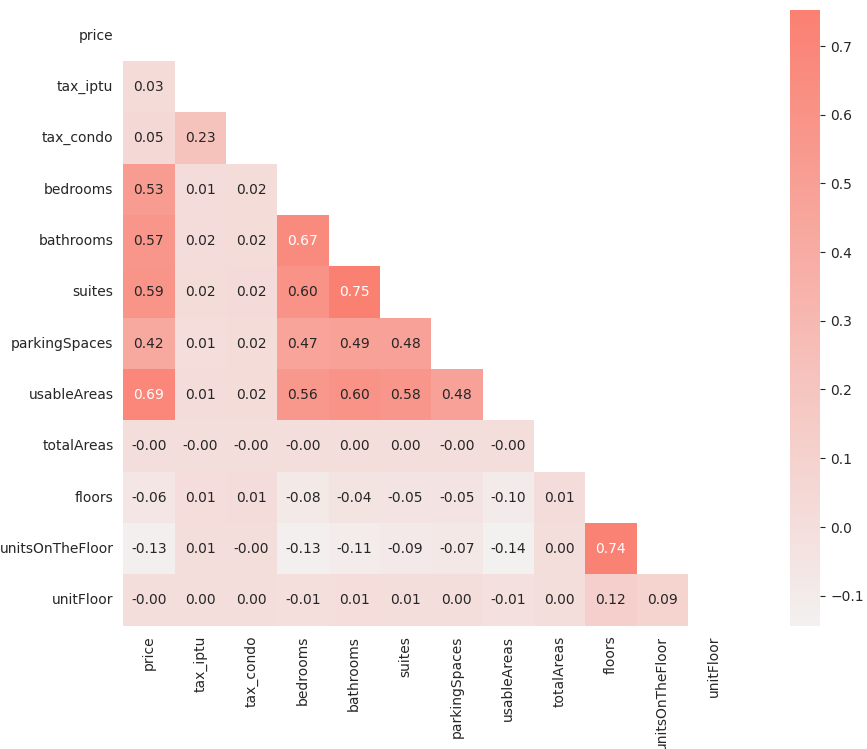

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlation, cmap=colors, mask=mask, square=True, fmt='.2f', annot=True)

Análise da distribuição da variável resposta.

Aqui da pra ver que nos dados, tem muito mais imoveis com preços mais baixos do que com preços mais altos, e isso pode causar um problema de acurácia no modelo
É uma variação muito assimétrica
Se eu treinar meu modelo assim, ele vai estar enviesado a valores mais baixos, mesmo que apareça uma casa com potencial para um valor muito alto

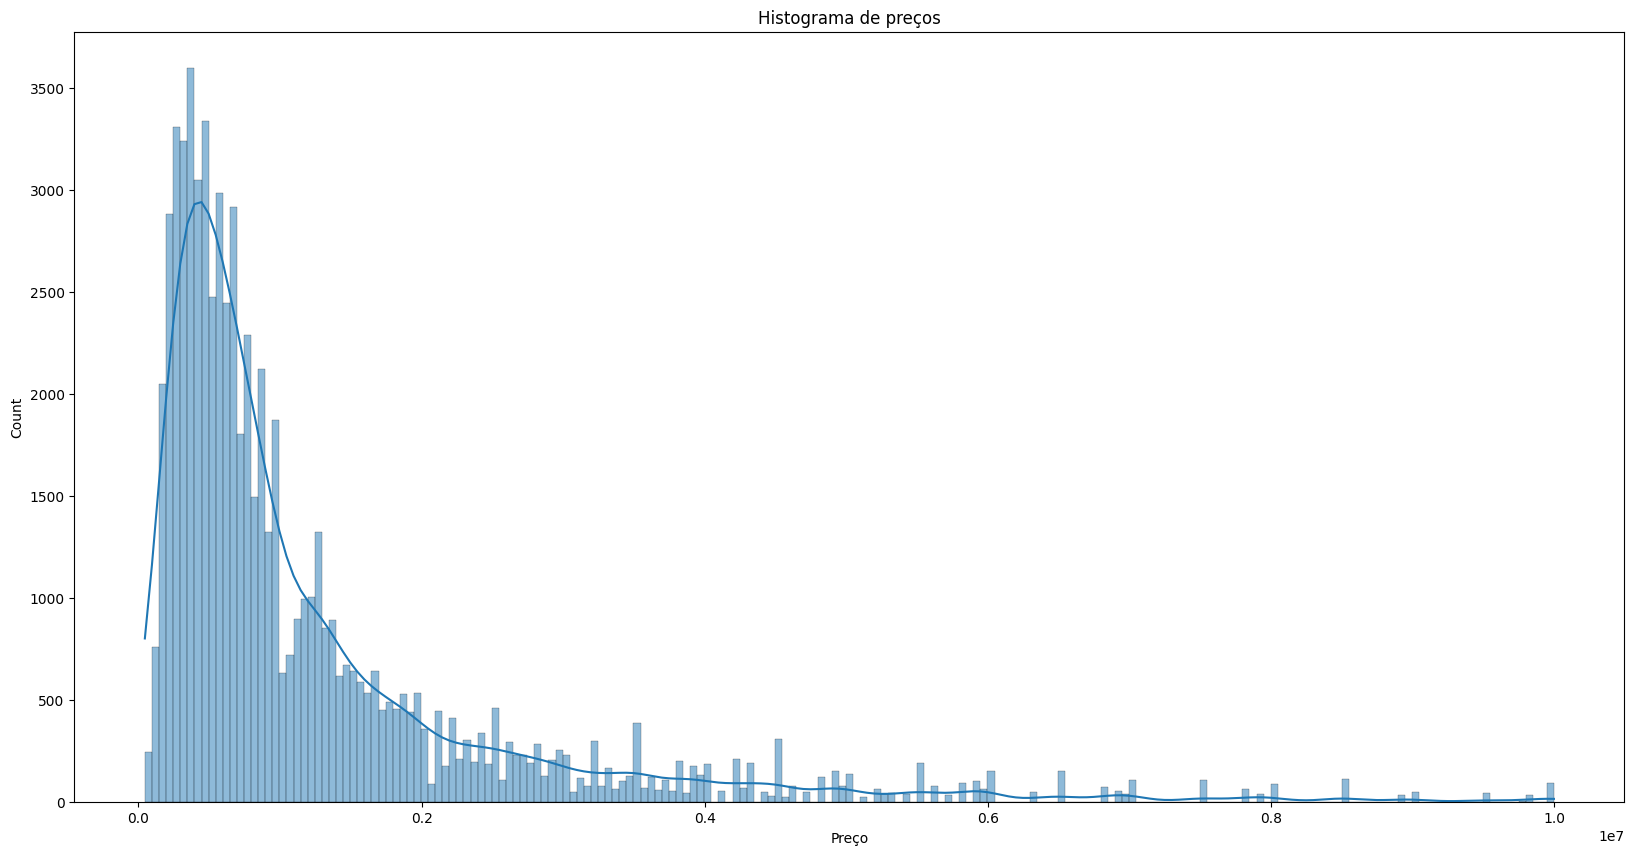

In [46]:
#antes (distrib. assimetrica a direita)
ax = sns.histplot(data=data_properties, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço');

### Transformação das variáveis 

Estamos realizando uma transformação logarítmica das variáveis para obtermos uma distribuição simétrica (mais próxima da normal), para que possamos usar o modelo de regressão linear. A transformação realizada é:


$$log1p = log(1+x)$$


Lembrar de realizar a transformação inversa para obter o valor original:


$$expm1 = exp(x) - 1$$ 




* Para mais detalhes consultar as documentações [`log1p`](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html), [`expm1`](https://numpy.org/doc/stable/reference/generated/numpy.expm1.html#numpy.expm1) e [`FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer)



In [48]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
data_transformed = transformer.transform(data_properties.select_dtypes(exclude=['object']))

c:\Users\anaca\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [49]:
columns_transformed_data = data_properties.select_dtypes(exclude=['object']).columns

df_transformed = pd.concat([data_properties.select_dtypes(include=['object']), pd.DataFrame(data_transformed, columns=columns_transformed_data)], axis=1)
df_transformed.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


Text(0.5, 0, 'Preço')

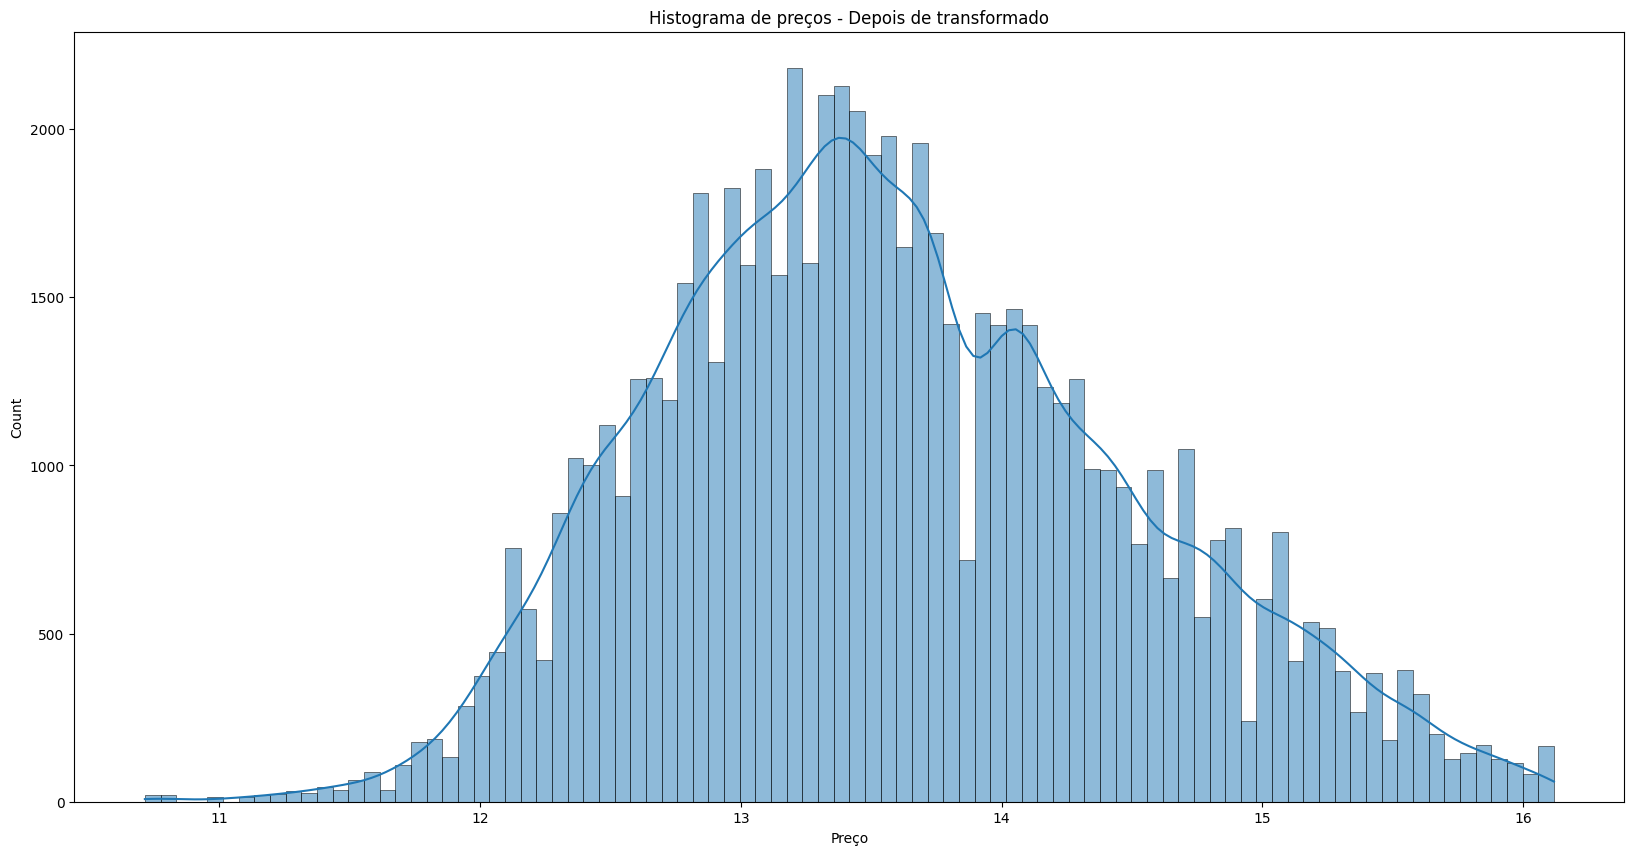

In [52]:
ax = sns.histplot(data=df_transformed, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços - Depois de transformado')
ax.set_xlabel('Preço')

### Dummies

In [53]:
#o que são variáveis categóricas?
categorigal_vars = df_transformed.select_dtypes(include=['object']).columns
categorigal_vars

Index(['unit', 'zone'], dtype='object')

cada categoria é transformada numa nova categoria com valor número (0 ou 1, é ou não é). Assim tratamos as variáveis categóricas

In [54]:
df_dummies = pd.get_dummies(df_transformed[categorigal_vars])
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,False,False,True,False,False,True,False
1,True,False,False,False,False,True,False
2,False,False,True,False,False,True,False
3,True,False,False,False,False,True,False
4,False,False,True,False,False,True,False


In [55]:
data_dummies = pd.concat([df_transformed.drop(categorigal_vars, axis=1), df_dummies], axis=1) 
data_dummies.head()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,True,False,False,False,False,True,False
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,True,False,False,False,False,True,False
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,False,False,True,False,False,True,False


## Regressão Linear

* "A análise de regressão diz respeito ao estudo da dependência de uma variável, a variável dependente, em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio (da população) da primeira em termos dos valores conhecidos ou fixados (em amostragens repetidas) das segundas."

* [Documentação Sklearn - LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) 

* Regressão Simples: a variável dependente (regressando ou `y`) se relaciona a uma única variável explanatória (regressor ou `X`).

* Regressão Múltipla: a variável dependente (regressando ou `y`) se relaciona a mais de uma única variável explanatória (regressor ou `Xi`).


## Ajuste e Previsão

Objetivo: prrever o valor (variável independente, o que é predito) de um imóvel a partir das suas características (variáveis preditoras/explanatórias)


### Divisão dos dados

In [56]:
#variáveis explanatórias (independentes)
X = data_dummies.drop('price', axis=1)

#variável dependente
y = data_dummies['price']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
#divisão em conjunto de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelo

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
#Instanciando o modelo
lr = LinearRegression()

In [61]:
#treino
lr.fit(X_treino, y_treino)

LinearRegression()

In [64]:
#teste
previsao_lr = lr.predict(X_teste)

#resultados da previsão
previsao_lr

array([13.25768024, 12.45705313, 12.91487963, ..., 13.13161073,
       12.42379775, 14.49548233], shape=(20877,))

In [65]:
#transformação inversa 
np.expm1(13.25768024)

np.float64(572448.7513552749)

## Métrica de desempenho

### Coeficiente de Determinação 

* descobrir quão “bem” uma linha de regressão amostral é adequada aos dados
* r2 situa-se entre 0 e 1
* "r2 mede a proporção ou percentual da variação total de Y explicada pelo modelo de regressão."





In [66]:
#importar a biblioteca
from sklearn.metrics import r2_score

In [67]:
r2_lr = r2_score(y_teste, previsao_lr)
r2_lr

0.7880682093407632